In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/kaggle/input/university-students-data/Kmeans_assignment_data.csv')

In [3]:
df.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   777 non-null    object 
 1   Private      777 non-null    object 
 2   Apps         777 non-null    int64  
 3   Accept       777 non-null    int64  
 4   Enroll       777 non-null    int64  
 5   Top10perc    777 non-null    int64  
 6   Top25perc    777 non-null    int64  
 7   F.Undergrad  777 non-null    int64  
 8   P.Undergrad  777 non-null    int64  
 9   Outstate     777 non-null    int64  
 10  Room.Board   777 non-null    int64  
 11  Books        777 non-null    int64  
 12  Personal     777 non-null    int64  
 13  PhD          777 non-null    int64  
 14  Terminal     777 non-null    int64  
 15  S.F.Ratio    777 non-null    float64
 16  perc.alumni  777 non-null    int64  
 17  Expend       777 non-null    int64  
 18  Grad.Rate    777 non-null    int64  
dtypes: float

In [5]:
df.isnull().sum()

Unnamed: 0     0
Private        0
Apps           0
Accept         0
Enroll         0
Top10perc      0
Top25perc      0
F.Undergrad    0
P.Undergrad    0
Outstate       0
Room.Board     0
Books          0
Personal       0
PhD            0
Terminal       0
S.F.Ratio      0
perc.alumni    0
Expend         0
Grad.Rate      0
dtype: int64

In [6]:
df = df.drop_duplicates()

In [7]:
df = df.rename(columns={'Unnamed: 0': 'University_Name'})

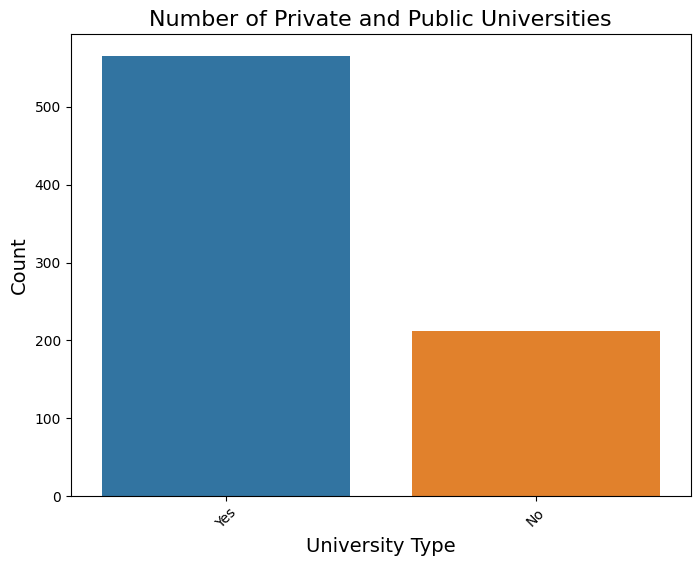

In [8]:
# Create a bar plot to compare the number of private and public universities
plt.figure(figsize=(8, 6))
sns.countplot(x='Private', data=df)
plt.title('Number of Private and Public Universities', fontsize=16)
plt.xlabel('University Type', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.show()

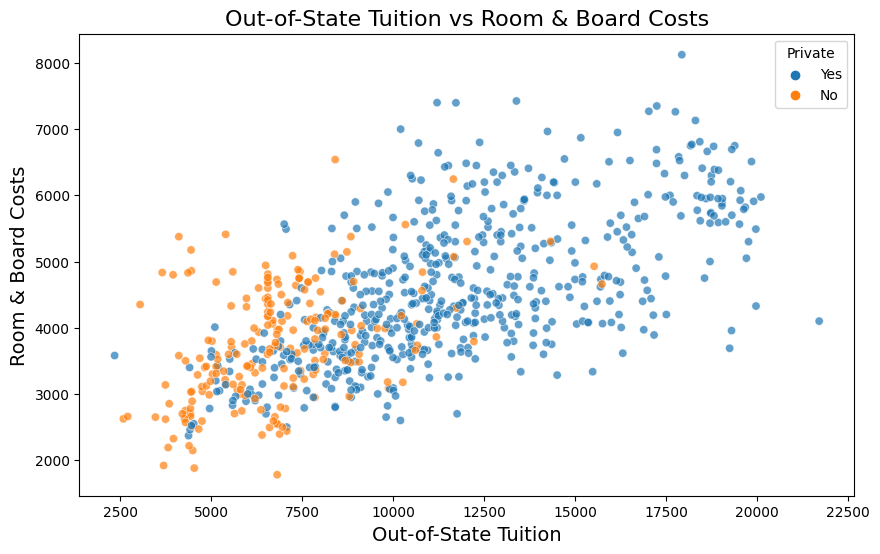

In [9]:
# Create a scatter plot to visualize the relationship between out-of-state tuition and room & board costs
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Outstate', y='Room.Board', data=df, hue='Private', alpha=0.7)
plt.title('Out-of-State Tuition vs Room & Board Costs', fontsize=16)
plt.xlabel('Out-of-State Tuition', fontsize=14)
plt.ylabel('Room & Board Costs', fontsize=14)
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


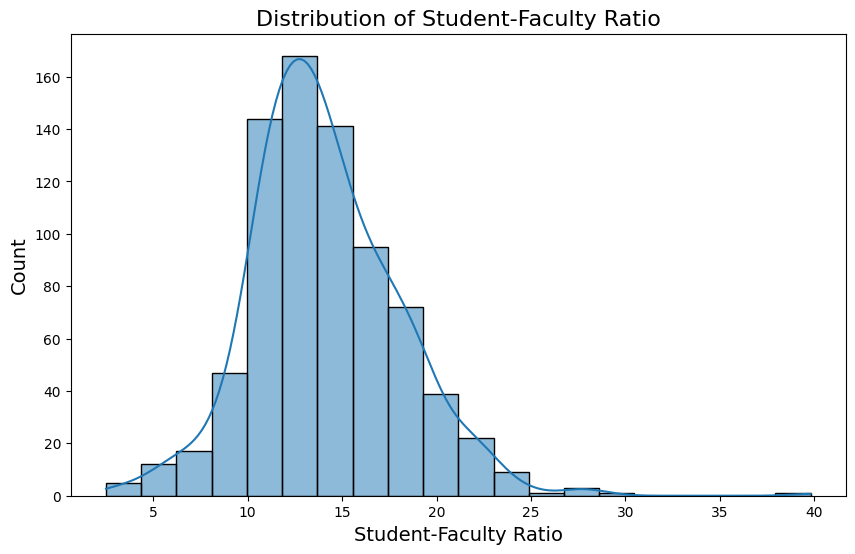

In [10]:
# Create a histogram to visualize the distribution of student-faculty ratio
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='S.F.Ratio', bins=20, kde=True)
plt.title('Distribution of Student-Faculty Ratio', fontsize=16)
plt.xlabel('Student-Faculty Ratio', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

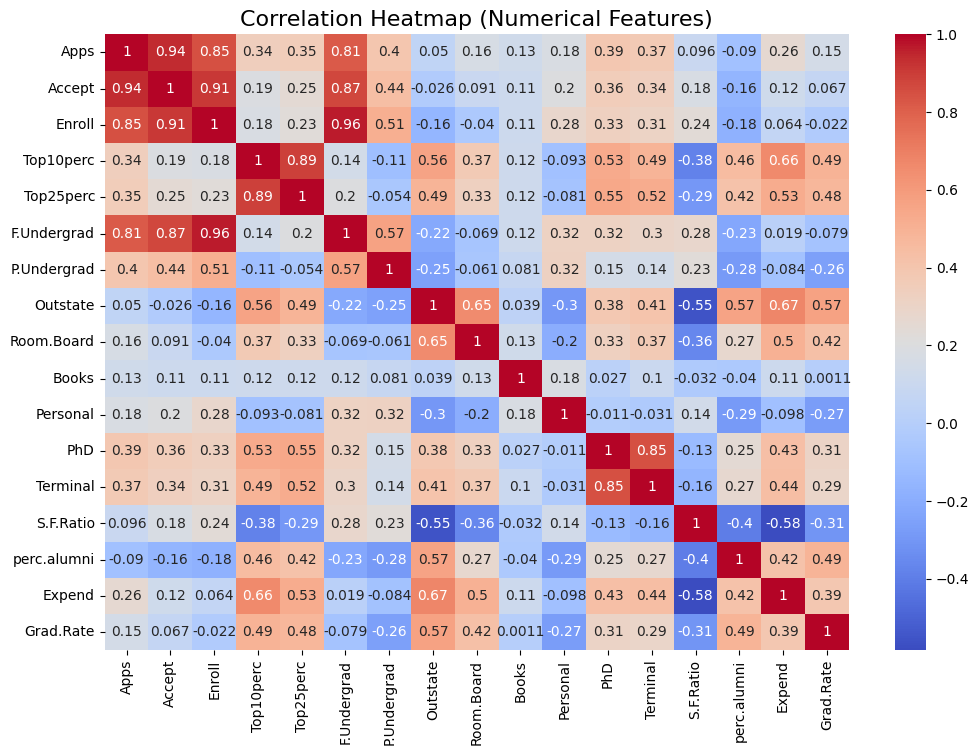

In [11]:
# Create a heatmap to visualize the correlation between numerical features
plt.figure(figsize=(12, 8))

# Select only the numerical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Calculate the correlation matrix for numerical columns
corr = df[numerical_cols].corr()

# Plot the heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap (Numerical Features)', fontsize=16)
plt.show()

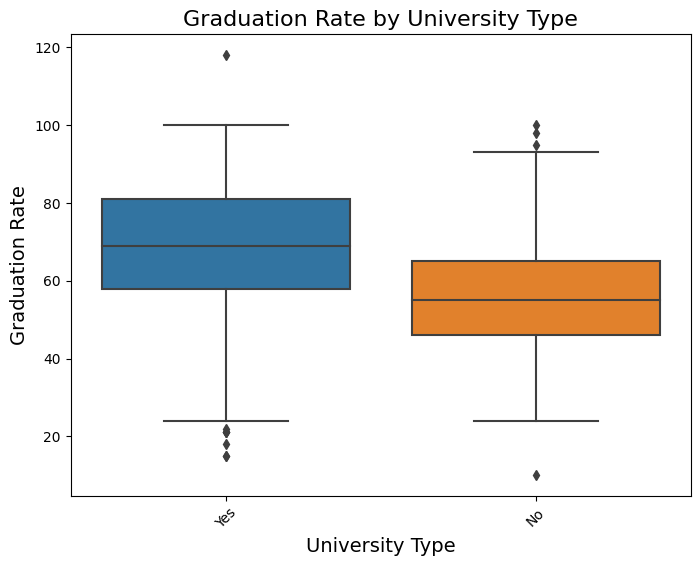

In [12]:
# Create a box plot to compare the graduation rates of private and public universities
plt.figure(figsize=(8, 6))
sns.boxplot(x='Private', y='Grad.Rate', data=df)
plt.title('Graduation Rate by University Type', fontsize=16)
plt.xlabel('University Type', fontsize=14)
plt.ylabel('Graduation Rate', fontsize=14)
plt.xticks(rotation=45)
plt.show()